<a href="https://colab.research.google.com/github/nastyanizovtseva/Prediction-of-the-investor-s-class/blob/main/%D0%BB%D1%8E%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GitGub

In [ ]:
cd /content/sample_data

/content/sample_data


In [ ]:
%pwd

'/content/sample_data'

In [ ]:
!git clone !git clone https://github.com/nastyanizovtseva/Prediction-of-the-investor-s-class.git

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recursive ...       alias of --recurse-submodules
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --reference-if-able <repo>
                          reference re

## Table of Contents


In [ ]:
!pip install catboost

In [ ]:
import warnings
import os
from io import StringIO

import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import models
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


#import from sklearn
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#сделаем красивый формат для дробных чисел
pd.set_option('display.float_format', '{:.2f}'.format)

#скроем возможные предупреждения
warnings.filterwarnings('ignore')

In [ ]:
train_path = '/content/drive/MyDrive/люба/data/train/train.csv'
train_deals_path = '/content/drive/MyDrive/люба/data/train/train_deals'
train_add_info_path = '/content/drive/MyDrive/люба/data/train/train_additional_info'

In [ ]:
df = pd.read_csv(train_path) #reading data from csv file train data

## Анализ

In [ ]:
data = df
data.info() #изучим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1527 non-null   int64 
 1   nickname        1527 non-null   object
 2   broker          1527 non-null   object
 3   start_sum       1527 non-null   object
 4   request         1527 non-null   int64 
 5   deals           1527 non-null   int64 
 6   income_rub      1527 non-null   object
 7   income_percent  1527 non-null   object
 8   class           1527 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 107.5+ KB


In [ ]:
# приведем данные к нужному типу
data['start_sum'] = data['start_sum'].str.replace(" ", "").str.replace(',','.').astype(float)
data['income_rub'] = data['income_rub'].str.replace(" ", "").str.replace(',','.').astype(float)
data['income_percent'] = data['income_percent'].str.replace("-", "0").str.replace(',','.').astype(float)

In [ ]:
#посмотрим долю пропусков
pd.DataFrame(data.isna().mean()*100)

,0
id,0.00
nickname,0.00
broker,0.00
start_sum,0.00
request,0.00
deals,0.00
income_rub,0.00
income_percent,0.00
class,0.00


In [ ]:
print('Число дубликатов:', data.duplicated().sum()) #проверим нет ли явных дубликатов

Число дубликатов: 0


In [ ]:
data.describe()

,id,start_sum,request,deals,income_rub,income_percent,class
count,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00,1527.00
mean,311944.58,420071.75,815.89,833.40,-15138.76,16.59,2.99
std,1243.15,541469.69,2867.26,2575.87,181854.56,24.66,1.41
min,309828.00,100000.00,1.00,0.00,-1872653.40,0.00,1.00
25%,310844.00,100000.00,20.00,24.50,-33286.79,1.83,2.00
50%,311894.00,187123.00,112.00,145.00,-1101.60,8.16,3.00
75%,313038.50,479810.14,556.00,659.00,8264.35,22.99,4.00
max,314288.00,4103087.72,56914.00,56703.00,2122319.28,398.80,5.00


In [ ]:
def draw_hist_and_boxplot(column):
    figure, ax = plt.subplots(1, 2, figsize=(15,5))
    data[column].plot(kind='hist', bins=50, ax=ax[0])
    data[column].plot(kind='box', ax=ax[1]);

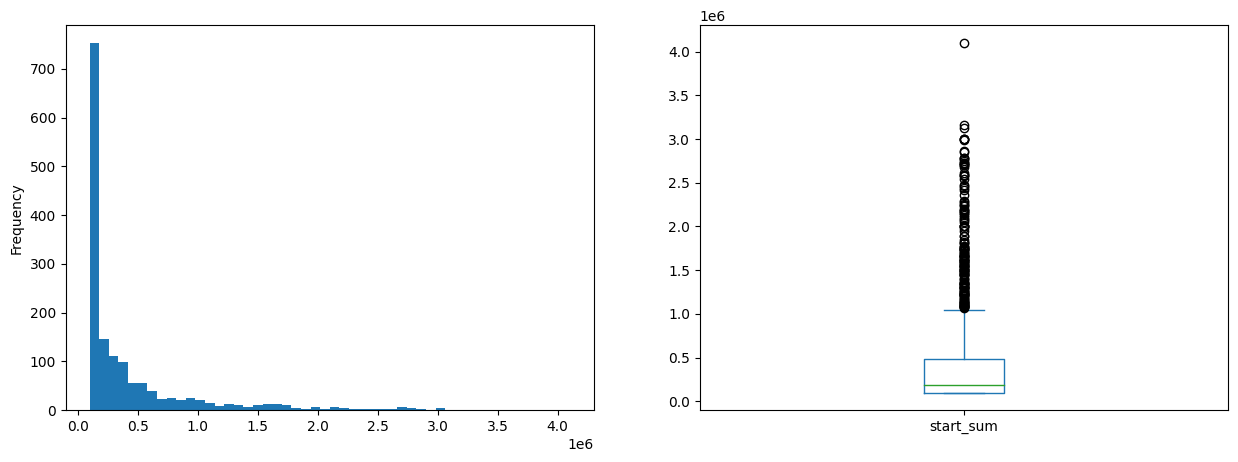

In [ ]:
draw_hist_and_boxplot('start_sum')

У стартовой суммы значения от 100 тысяч до 3 миллионов, в большинстве случаев стартовая сумма составляет как раз минимальные 100 тысяч, выбросы - значения после одного миллиона.

In [ ]:
data[data['start_sum'] > data['start_sum'].std() ]['start_sum'].describe()

count       333.00
mean    1239922.81
std      656669.97
min      542018.06
25%      728000.00
50%     1000000.00
75%     1587717.00
max     4103087.72
Name: start_sum, dtype: float64

In [ ]:
data[data['start_sum'] > 4* data['start_sum'].std()]

выбросов нет



In [ ]:
draw_hist_and_boxplot('request')

request - это количество заявок для сделки и здесь явно много выбросов и аномальных значений. В основном до 500 заявок, однако есть человек у которого было и 28 тысяч заявок **(по-моему это странно и надо об этом спросить).**

In [ ]:
data[data['request'] > data['request'].std()]['request'].describe()

count      89.00
mean     8478.29
std      8643.65
min      2879.00
25%      3745.00
50%      5297.00
75%      8938.00
max     56914.00
Name: request, dtype: float64

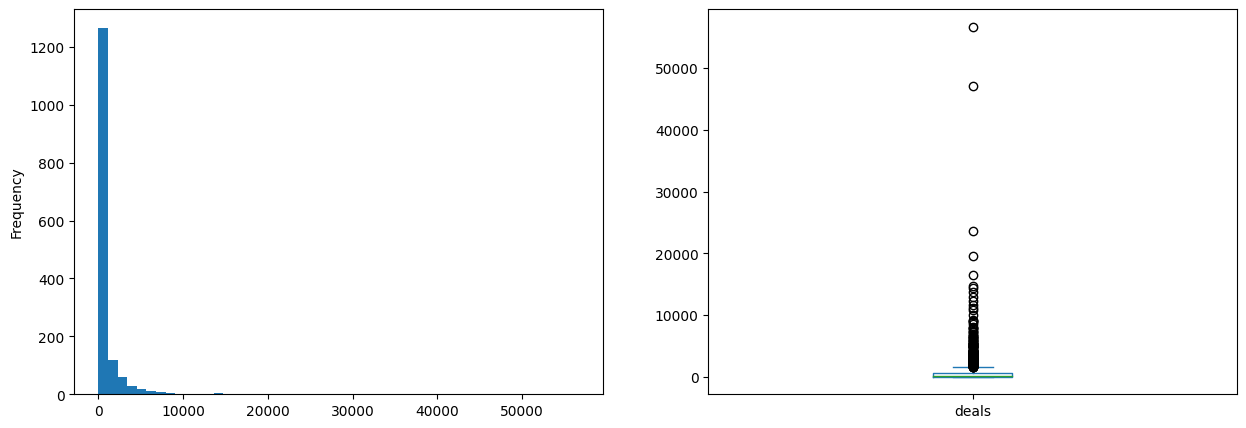

In [ ]:
draw_hist_and_boxplot('deals')

То же самое и с количеством сделок, в основном их около 600, но встречаются и люди, у которых их 43 тысячи, **(что также странно и об этом, наверное, нужно спросить)**

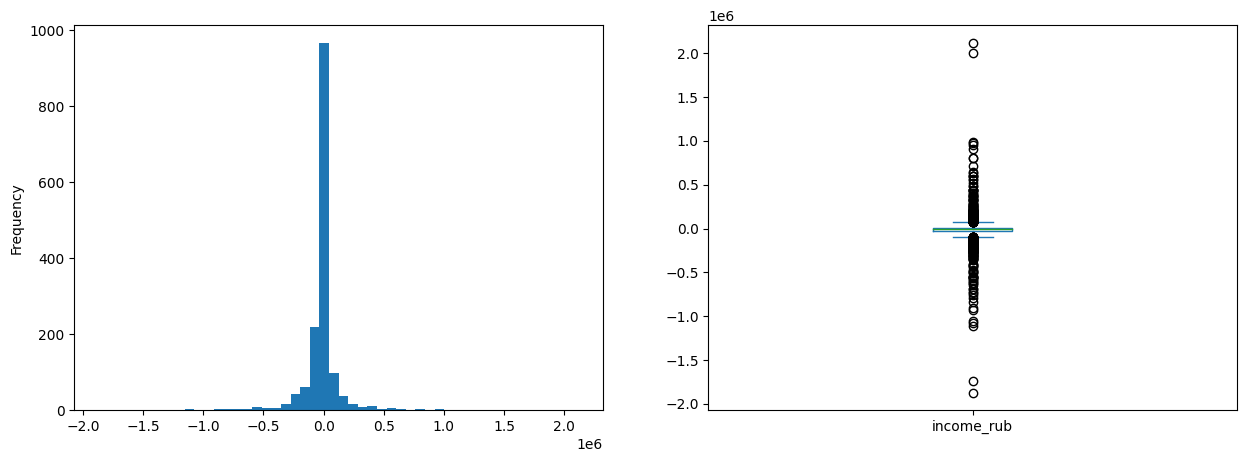

In [ ]:
draw_hist_and_boxplot('income_rub')

В полне логично, что у всех разный доход, но можно заметить, что большинство людей выходят в 0. Судя по выбросам, есть супер богатые и банкроты )))

In [ ]:
# вернуть дф, в котором удалены строчки, где значения превышают 3 std
def del_rows_that_bigger(df, col):
  return df[(df[col] > df[col].mean() - 3*df[col].std()) & (df[col] < df[col].mean() + 3*df[col].std())]

In [ ]:
new_df = del_rows_that_bigger(data, 'income_rub')
# Сколько удалилось:
(data.shape[0] - new_df.shape[0])/data.shape[0]

In [ ]:
df['class'].value_counts() # check how many target classes

## EDA


In [ ]:
# editing data in df, making int or float data types instead of object type
df['income_rub'] = (df['income_rub'].replace(',','.', regex=True).replace(' ','', regex=True).astype('float'))
df[df['income_percent'] == '-'] = 0  #replacing all "-" with zeros 
df['income_percent'] = (df['income_percent'].replace(',','.', regex=True).astype('float'))
df['start_sum'] = (df['start_sum'].replace(',','.', regex=True).replace(' ','', regex=True).astype('float'))

In [ ]:
#spliting df into features and target values 
features, target = df[['id','start_sum',"request","deals","income_rub","income_percent"]], df["class"] 

In [ ]:
features

,id,start_sum,request,deals,income_rub,income_percent
0,311613,264530.00,2081,934,58101.51,21.96
1,311209,103693.18,439,805,11351.71,10.95
2,313350,951481.94,636,938,-23613.53,-2.48
3,310145,660000.00,932,1072,-198473.31,-30.07
4,310555,116025.00,46,44,-4187.62,-3.61
...,...,...,...,...,...,...
1522,313159,100000.00,289,286,-1494.68,-1.49
1523,314178,2702622.00,12,170,-169978.18,-6.29
1524,310108,100000.00,159,41,-384.07,-0.38
1525,310840,100000.00,3,10,-572.86,-0.57


## Вытаскием данные из других табличек

In [ ]:
for filename in os.listdir(train_deals_path):
    filename_id = filename[2:-4] # getting user id from folder's name
    #print(filename_id)
     
    if filename.endswith('.zip'): #take only zip files
        with zipfile.ZipFile(os.path.join(train_deals_path, filename), 'r') as zip_ref: 
            for file in zip_ref.namelist():
                with zip_ref.open(file) as f_in:#opening and reading files
                    file_content = f_in.read().decode('utf-8') #reading file's content 
                    content = StringIO(file_content) #making it csv file, so we can read it with "read_csv"
                    auxiliary_df = pd.read_csv(content, sep=";", names=['time','tool','quantity','sum'])
                    auxiliary_df['date'] = auxiliary_df['time'].str[:10] # extracting date from datetime column to group by date

                    #getting how many tools a user was using
                    features.loc[features['id'] == int(filename_id), ['amount_of_tools']] = len(auxiliary_df['tool'].unique()) 

                    #getting user's everage deals by days 
                    features.loc[features['id'] == int(filename_id), ['everage_deals_by_day']] = auxiliary_df.groupby('date').count().mean().iloc[1]

                    #getting user's mean sum by days 
                    features.loc[features['id'] == int(filename_id), ['mean_sum_by_days']] = auxiliary_df['sum'].mean().round(2)

                    #getting user's max sum by days 
                    features.loc[features['id'] == int(filename_id), ['max_sum_by_days']] = auxiliary_df['sum'].max()


In [ ]:
def read_all_csv_files(folder_path):
    n = 0
    for root, dirs, files in os.walk(folder_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            filename_id = dir_name[3:] # get user's id from dir's name
            print('file: ', filename_id, 'progress:', (n/15), '%') # progress bar kinda ;)

            for file in os.listdir(dir_path):

                if filename_id.isdigit(): #check that's filename contains user's id by checking special part of it's name

                    if file.endswith(".csv"): # get only csv files

                        file_path = os.path.join(dir_path, file)

                        #work with stats table file
                        if 'stats_table' in file:
                            auxiliary_df = pd.read_csv(file_path, sep=';', header=0) #reading file
                            #print('sdf - ', auxiliary_df)
                            #getting all values from stats table row "all_markets"
                            features.loc[features['id'] == int(filename_id), ['money_turnover']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['money_turnover']].values[0]
                            #print('\n\n stock_market  - ',type(auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'stock_market', ['deals']].values[0][0]),'\n\n fonts - ', auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'forts_market', ['deals']].values[0][0])
                            features.loc[features['id'] == int(filename_id), ['ration_of_stock_market']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'stock_market', ['deals']].values[0][0]*100/ auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['deals']].values[0][0]
                            features.loc[features['id'] == int(filename_id), ['ration_of_forts_market']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'forts_market', ['deals']].values[0][0]*100/ auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['deals']].values[0][0]
                            #features.loc[features['id'] == int(filename_id), ['ration_of_income_stock_market']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'stock_market', ['income_rubles']].values[0][0]*100/ auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['income_rubles']].values[0][0]
                            features.loc[features['id'] == int(filename_id), ['ration_of_income_forts_market']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'forts_market', ['income_rubles']].values[0][0]*100/ auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['income_rubles']].values[0][0]
                            #features.loc[features['id'] == int(filename_id), ['ration_of_turnover_stock_market']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'stock_market', ['money_turnover']].values[0][0]*100/ auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['money_turnover']].values[0][0]
                            features.loc[features['id'] == int(filename_id), ['ration_of_turnover_forts_market']] = auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'forts_market', ['money_turnover']].values[0][0]*100/ auxiliary_df.loc[ auxiliary_df['Unnamed: 0'] == 'all_markets', ['money_turnover']].values[0][0]
                            
                        #work with stats table file
                        if 'account_condition' in file:
                            auxiliary_df = pd.read_csv(file_path, sep=';', header=0)

                            #clearing column 'free_funds'
                            auxiliary_df['free_funds_clear'] = auxiliary_df['free_funds'].apply(lambda x: x.split('(', 1)[-1].split(')', 1)[0]).apply(lambda x: 0 if (x == '-' or x =='+') else x).astype('float')
                            
                            # getting average free funds 
                            features.loc[features['id'] == int(filename_id), ['average_free_funds']] = float(auxiliary_df['free_funds_clear'].diff().mean())
                        
                        #work with reference point file
                        if 'reference_point' in file:
                            auxiliary_df = pd.read_csv(file_path, sep=';', header=0)
                            features.loc[features['id'] == int(filename_id), ['average_end_day_balance']] = auxiliary_df['end_day_balance'].diff().mean()
                         
            n+=1
                            
                        
folder_path = train_add_info_path # set folder's path
read_all_csv_files(folder_path)

## Матрица корреляций

In [ ]:
corr_matrix = features.corr() # get correlation matrix of the df

cm = sns.light_palette("green", as_cmap=True) # setting heatmap 

styled_corr_matrix = corr_matrix.style.background_gradient(cmap=cm)
styled_corr_matrix

,start_sum,request,deals,income_rub,income_percent,len_tool,everage_deals_by_day,mean_sum_by_days,max_sum_by_days,money_turnover,average_free_funds,average_end_day_balance
start_sum,1.000000,0.029836,0.177594,-0.156113,-0.018638,0.019474,0.195855,0.116860,0.160411,0.218883,0.316415,-0.103153
request,0.029836,1.000000,0.500729,0.021873,0.086322,0.211858,0.482775,0.103858,0.153496,0.349735,-0.007249,-0.002043
deals,0.177594,0.500729,1.000000,-0.035541,0.131305,0.118067,0.940023,0.129611,0.216739,0.822455,0.014786,-0.029194
income_rub,-0.156113,0.021873,-0.035541,1.000000,0.647233,0.001443,-0.037030,-0.054127,-0.051331,-0.098138,-0.081378,-0.006665
income_percent,-0.018638,0.086322,0.131305,0.647233,1.000000,-0.014433,0.107266,-0.055301,-0.027741,0.162965,-0.020879,-0.012871
len_tool,0.019474,0.211858,0.118067,0.001443,-0.014433,1.000000,0.123397,-0.001142,0.243500,0.080809,0.010046,-0.014405
everage_deals_by_day,0.195855,0.482775,0.940023,-0.037030,0.107266,0.123397,1.000000,0.137668,0.211463,0.768098,0.040020,-0.017618
mean_sum_by_days,0.116860,0.103858,0.129611,-0.054127,-0.055301,-0.001142,0.137668,1.000000,0.652368,0.195940,-0.023292,0.004752
max_sum_by_days,0.160411,0.153496,0.216739,-0.051331,-0.027741,0.243500,0.211463,0.652368,1.000000,0.253206,-0.017969,-0.041178
money_turnover,0.218883,0.349735,0.822455,-0.098138,0.162965,0.080809,0.768098,0.195940,0.253206,1.000000,-0.002297,0.004416


In [ ]:
#save features (do not do )
#####features.to_csv(r'/content/drive/MyDrive/люба/features.csv', index= False )

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/люба/features_good.csv') #upload ready data
features = features.drop('id', axis=1)
features = features.drop('part_income', axis=1)
features = features.drop('part_turnover', axis=1)

## Обучение моделек


In [ ]:
features=features.fillna(0)

In [ ]:
# X_train for xgboost
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values.reshape(-1,1), train_size = 0.8 , shuffle = True, random_state= 50 )

In [ ]:
# train set for catboost
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8 , shuffle = True, random_state= 50) #random_state = 65 (try - 56)

In [ ]:
#sklearn.metrics.SCORERS.keys() # all metrics from sklearn

### Feature engeneering

In [ ]:
features_engeneered = features.copy()

 +log from income_percent

In [ ]:
features_engeneered['income_percent_plus_min'] = features_engeneered['income_percent'] - features_engeneered['income_percent'].min()
features_engeneered['income_percent_log'] = np.log(features_engeneered['income_percent_plus_min'])
features_engeneered = features_engeneered.drop('income_percent_plus_min', axis=1)

+log from income_rub


In [ ]:
features_engeneered['income_rub_plus_min'] = features_engeneered['income_rub'] - features_engeneered['income_rub'].min()
features_engeneered['income_rub_log'] = np.log(features_engeneered['income_rub_plus_min'])
features_engeneered = features_engeneered.drop('income_rub_plus_min', axis=1)

+log from money_turnover




In [ ]:
features_engeneered['money_turnover_min'] = features_engeneered['money_turnover'] - features_engeneered['money_turnover'].min()
features_engeneered['money_turnover_log'] = np.log(features_engeneered['money_turnover_min'])
features_engeneered = features_engeneered.drop('money_turnover_min', axis=1)

In [ ]:
features_engeneered = features_engeneered.drop('money_turnover_log', axis=1) # delete usefull column

+log from average_free_funds

In [ ]:
features_engeneered['average_free_funds_min'] = features_engeneered['average_free_funds'] - features_engeneered['average_free_funds'].min()
features_engeneered['average_free_funds_log'] = np.log(features_engeneered['average_free_funds_min'])
features_engeneered = features_engeneered.drop('average_free_funds_min', axis=1)

Income_perent^2 + money_turnover



In [ ]:
features_engeneered['income_percent^2 + money_turnover'] = features_engeneered['income_percent']**2 + features_engeneered['money_turnover']

In [ ]:
features_engeneered = features_engeneered.drop('income_percent^2 + money_turnover', axis=1) # delete usefull column

+income_percent_cubed







In [ ]:
features_engeneered['income_percent_cubed'] = features_engeneered['income_percent']**3

In [ ]:
features_engeneered = features_engeneered.drop('income_percent_cubed', axis=1) # delete usefull column

+income_percent_devideby_money_turnover




In [ ]:
features_engeneered['income_percent_devideby_money_turnover'] = features_engeneered['income_percent']/features_engeneered['money_turnover']

In [ ]:
features_engeneered = features_engeneered.drop('income_percent_devideby_money_turnover', axis=1) # delete usefull column

show current columns 

In [ ]:
print(features_engeneered.columns.values,' \n\n numb of columns:', len(features_engeneered.columns.to_list()))

['start_sum' 'request' 'deals' 'income_rub' 'income_percent' 'len_tool'
 'everage_deals_by_day' 'mean_sum_by_days' 'max_sum_by_days'
 'money_turnover' 'average_free_funds' 'average_end_day_balance'
 'income_percent_log' 'income_rub_log' 'money_turnover_log'
 'average_free_funds_log' 'income_percent^2 + money_turnover'
 'income_percent_cubed' 'income_percent_devideby_money_turnover']  

 numb of columns: 19


good columns for catboost: 'start_sum', 'request', 'deals', 'income_rub', 'income_percent',
       'len_tool', 'everage_deals_by_day', 'mean_sum_by_days',
       'max_sum_by_days', 'money_turnover', 'average_free_funds',
       'average_end_day_balance', 'income_percent_log', 'income_rub_log',
       'average_free_funds_log', 'income_percent_cubed'

train test split for engeneered features

In [ ]:
features_engeneered=features_engeneered.fillna(0)

In [ ]:
# split for xgboost
X_train_engeneered, X_test_engeneered, y_train_engeneered, y_test_engeneered = train_test_split(features_engeneered.values, target.values.reshape(-1,1), train_size = 0.8 , shuffle = True, random_state = 50)

In [ ]:
# split for cat boost
X_train_engeneered, X_test_engeneered, y_train_engeneered, y_test_engeneered = train_test_split(features_engeneered, target, train_size = 0.8 , shuffle = True, random_state = 50) #random_state = 45

In [ ]:
features_engeneered.isna().sum()

### Catboost

In [ ]:
object_columns = X_train.select_dtypes(include='object').columns.tolist()
cat_boost_clf = CatBoostClassifier(cat_features=object_columns)
cat_boost_clf.fit(X_train, y_train)
y_pred_cat_boost = cat_boost_clf.predict(X_test)

# Evaluate model performance
print("Accuracy: ",  accuracy_score( y_test, y_pred_cat_boost))
print("Precision: ", precision_score(y_test, y_pred_cat_boost, average='weighted'))
print("Recall: ",    recall_score(   y_test, y_pred_cat_boost, average='weighted'))
print("F1-Score: ",  f1_score(       y_test, y_pred_cat_boost, average='weighted')) 

### Catboost engeneered

In [ ]:
columns_list_ = [1,2,3,4,5,9]

object_columns = X_train_engeneered.select_dtypes(include='object').columns.tolist()
cat_boost_clf_engeneered = CatBoostClassifier(cat_features=object_columns)
cat_boost_clf_engeneered.fit(X_train_engeneered, y_train_engeneered, verbose=False )

y_pred_cat_boost_engeneered = cat_boost_clf_engeneered.predict(X_test_engeneered)

# Evaluate model performance
y_pred_for_test = y_test_engeneered
print("Accuracy: " , accuracy_score( y_pred_for_test, y_pred_cat_boost_engeneered))
print("Precision: ", precision_score(y_pred_for_test, y_pred_cat_boost_engeneered, average='weighted'))
print("Recall: "   , recall_score(   y_pred_for_test, y_pred_cat_boost_engeneered, average='weighted'))
print("F1-Score: " , f1_score(       y_pred_for_test, y_pred_cat_boost_engeneered, average='weighted')) #rd state - 45 # 0.9283150951703545

Accuracy:  0.5980392156862745
Precision:  0.597592795041958
Recall:  0.5980392156862745
F1-Score:  0.5957025464747315


feature importances for cat boost

In [ ]:
df_feature_importances_of_cat_boost = pd.DataFrame({'Feature_name': features_engeneered.columns, 'Importance': cat_boost_clf_engeneered.feature_importances_})
df_feature_importances_of_cat_boost.sort_values(by='Importance', ascending=False)

,Feature_name,Importance
4,income_percent,10.37
17,income_percent_devideby_money_turnover,7.11
16,income_percent_cubed,6.87
0,start_sum,6.86
12,income_percent_log,6.27
10,average_free_funds,6.21
14,average_free_funds_log,5.73
5,len_tool,5.65
6,everage_deals_by_day,5.61
11,average_end_day_balance,5.55


save model

In [ ]:
model = cat_boost_clf_engeneered
model.save_model('cat_boost',
           format="cbm",
           export_parameters= None,
           pool=None)

## LightGBM

In [ ]:
y_train_lightgbm, y_test_lightgbm  = y_train - 1, y_test - 1

Gridsearch CV

In [ ]:
lgbm_clf = lgb.LGBMClassifier(objective='multiclass', metric = 'multi_logloss', num_class = len(y_train_lightgbm.unique()), )

In [ ]:
search_space_lgbm_clf = {
    'n_estimators': [50, 100, 150, 250],
    'learning_rate': [0.1, 0.01, 0.001],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9],
    #'min_child_samples': [1, 5, 10], 
    "max_depth":[1,3,5,6]
}

In [ ]:
lgbm_clf_CV = GridSearchCV(estimator = lgbm_clf,
                  param_grid = search_space_lgbm_clf,
                  scoring = ['f1_weighted', 'precision_weighted'], 
                  refit = 'f1_weighted',
                  #cv = 5,
                  verbose = 4)


In [ ]:
lgbm_clf_CV.fit(X_train, y_train_lightgbm)
print("Best Parameters: ", lgbm_clf_CV.best_params_)
print("Best Score: ", lgbm_clf_CV.best_score_)

In [ ]:
print("Best Parameters: ", lgbm_clf_CV.best_params_)
print("Best Score: ", lgbm_clf_CV.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best Score:  0.6150432180216209


Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}

f1 -  0.6150432180216209

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': len(y_train_lightgbm.unique()),
    'n_estimators': 150,
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'verbose': 0
}

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train_lightgbm)
test_data = lgb.Dataset(X_test, label=y_test_lightgbm)

In [ ]:
num_rounds = 10000
lgbm_clf_test = lgb.train(params, train_data, num_rounds, valid_sets=[test_data])

In [ ]:
y_pred_lightgbm = lgbm_clf_test.predict(X_test)

# Evaluate model performance


print("Accuracy: ", accuracy_score(y_test_lightgbm, y_pred_lightgbm.argmax(axis=1)))
print("Precision: ", precision_score(y_test_lightgbm, y_pred_lightgbm.argmax(axis=1), average='weighted'))
print("Recall: ", recall_score(y_test_lightgbm, y_pred_lightgbm.argmax(axis=1), average='weighted'))
print("F1-Score: ", f1_score(y_test_lightgbm, y_pred_lightgbm.argmax(axis=1), average='weighted')) #0.6167719252397739

Accuracy:  0.6209150326797386
Precision:  0.6318689554216979
Recall:  0.6209150326797386
F1-Score:  0.6167719252397739


Data engeneering

In [ ]:
testtesttest_df = pd.DataFrame(X_test_engeneered)

c = np.isinf(X_test_engeneered).values.sum()
print("It contains " + str(c) + " infinite values")

In [ ]:
if np.isinf(X_test_engeneered).any():
    print("The array contains infinity!")
else:
    print("The array does not contain infinity.")

The array does not contain infinity.


In [ ]:
indices = np.isinf(X_test_engeneered)
X_test_engeneered[indices] = 0

In [ ]:
y_train_engeneered_lightgbm, y_test_engeneered_lightgbm  = y_train_engeneered - 1, y_test_engeneered - 1

In [ ]:
train_data_engeneered = lgb.Dataset(X_train_engeneered, label=y_train_engeneered_lightgbm)
test_data_engeneered = lgb.Dataset(X_test_engeneered, label=y_test_engeneered_lightgbm)

In [ ]:
lgbm_clf_test_engeneered = lgb.train(params, train_data_engeneered, num_rounds, valid_sets=[test_data_engeneered])


In [ ]:
y_pred_lgmb_engeneered = lgbm_clf_test_engeneered.predict(X_test_engeneered)

In [ ]:
print("Accuracy: ", accuracy_score(y_test_engeneered_lightgbm, y_pred_lgmb_engeneered.argmax(axis=1)))
print("Precision: ", precision_score(y_test_engeneered_lightgbm, y_pred_lgmb_engeneered.argmax(axis=1), average='weighted'))
print("Recall: ", recall_score(y_test_engeneered_lightgbm, y_pred_lgmb_engeneered.argmax(axis=1), average='weighted'))
print("F1-Score: ", f1_score(y_test_engeneered_lightgbm, y_pred_lgmb_engeneered.argmax(axis=1), average='weighted')) #0.6503896308522805

Accuracy:  0.6503267973856209
Precision:  0.6574739701133624
Recall:  0.6503267973856209
F1-Score:  0.6495530345449217


## gradient boosting from sklearn

In [ ]:
gradient_boost_clf = GradientBoostingClassifier()

In [ ]:
#(len(y_train) - (np.count_nonzero(y_train - y_pred)))/len(y_train)

In [ ]:
search_space_grad_boost = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
gradient_boost_clf_CV = GridSearchCV(estimator = gradient_boost_clf,
                  param_grid = search_space_grad_boost,
                  scoring = ['f1_weighted', 'precision_weighted'], 
                  refit = 'f1_weighted',
                  cv = 3,
                  verbose = 4)

In [ ]:
gradient_boost_clf_CV.fit(X_train, y_train)
print(gradient_boost_clf_CV.best_params_)
print(gradient_boost_clf_CV.best_score_)

In [ ]:
print(gradient_boost_clf_CV.best_params_)
print(gradient_boost_clf_CV.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.6127687031202614


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500

f1 - 0.6127687031202614





In [ ]:
gradient_boost_clf_test = GradientBoostingClassifier(learning_rate = 0.01, max_depth= 3, n_estimators= 500)

In [ ]:
gradient_boost_clf_test.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [ ]:
y_pred_grad_boost = gradient_boost_clf_test.predict(X_test)

In [ ]:
f1_weighted_grad_boost_score  = f1_score(y_test, y_pred_grad_boost, average= 'macro')

In [ ]:
f1_weighted_grad_boost_score

0.6465251435913176

### feature importance of gradient boost checkup

In [ ]:
gradient_boost_clf_test.feature_importances_

array([0.02499834, 0.00757635, 0.015137  , 0.08903881, 0.59171019,
       0.01147096, 0.01256926, 0.01784226, 0.01542853, 0.11740946,
       0.08106511, 0.01575373])

In [ ]:
df_feature_importances_of_grad_boost = pd.DataFrame({'Feature_name': features.columns, 'Importance': gradient_boost_clf_test.feature_importances_})
df_feature_importances_of_grad_boost.sort_values(by='Importance', ascending=False)

,Feature_name,Importance
4,income_percent,0.59
9,money_turnover,0.12
3,income_rub,0.09
10,average_free_funds,0.08
0,start_sum,0.02
7,mean_sum_by_days,0.02
11,average_end_day_balance,0.02
8,max_sum_by_days,0.02
2,deals,0.02
6,everage_deals_by_day,0.01


## XGBoost

In [ ]:
XGBClassifier_clf = XGBClassifier()

In [ ]:
search_space_XGBClassifier= {
    "subsample":[0.5, 0.75, 1],
    "n_estimators":[50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1, 0.001, 0.0001],
    
}

In [ ]:
XGBClassifier_clf_CV = GridSearchCV(estimator = XGBClassifier_clf,
                  param_grid = search_space_XGBClassifier,
                  scoring = ['f1_weighted', 'precision_weighted'], 
                  refit = 'f1_weighted',
                  cv = 5,
                  verbose = 4)

In [ ]:
XGBClassifier_clf_CV.fit(X_train, y_train_xgboost)
print(XGBClassifier_clf_CV.best_params_)
print(XGBClassifier_clf_CV.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.5}


f1 - 0.6357350304852706



In [ ]:
y_train_xgboost  = y_train - 1

In [ ]:
y_test_xgboost = y_test - 1

In [ ]:
y_train_xgboost 

array([[3],
       [2],
       [3],
       ...,
       [2],
       [4],
       [2]])

In [ ]:
XGBClassifier_clf_test = XGBClassifier(learning_rate = 0.01, max_depth= 5, n_estimators = 250, subsample = 0.5)

In [ ]:
XGBClassifier_clf_test.fit(X_train, y_train_xgboost)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgboost = XGBClassifier_clf_test.predict(X_train)

In [ ]:
f1_weighted_xgboost_score  = f1_score(y_train, (y_pred_xgboost+1), average= 'weighted')
f1_weighted_xgboost_score  #0.9213943405888975

0.8600477171454554

Implementing feature engeneering

In [ ]:
testtesttest_df = pd.DataFrame(X_test_engeneered)

c = np.isinf(X_test_engeneered).values.sum()
print("It contains " + str(c) + " infinite values")

In [ ]:
if np.isinf(X_test_engeneered).any():
    print("The array contains infinity!")
else:
    print("The array does not contain infinity.")

The array does not contain infinity.


In [ ]:
indices = np.isinf(X_test_engeneered)
X_test_engeneered[indices] = 0

In [ ]:
XGBClassifier_clf_test_engeneered = XGBClassifier(learning_rate = 0.01, max_depth= 5, n_estimators = 250, subsample = 0.5)
XGBClassifier_clf_test_engeneered.fit(X_test_engeneered, y_test_xgboost)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgboost_engeneered = XGBClassifier_clf_test_engeneered.predict(X_test_engeneered)

In [ ]:
# +++ log(income_percent - min) ++ income_percent - min
f1_weighted_xgboost_score_engeneered  = f1_score(y_test, (y_pred_xgboost_engeneered+1), average= 'weighted')
f1_weighted_xgboost_score_engeneered     #0.9673027413288482

0.9673027413288482

In [ ]:
# +++ log(income_rub - min) ++ income_rub - min
f1_weighted_xgboost_score_engeneered  = f1_score(y_test, (y_pred_xgboost_engeneered+1), average= 'weighted')
f1_weighted_xgboost_score_engeneered     #0.973713548852906

0.973713548852906

In [ ]:
# +++ log(money_turnover - min) ++ money_turnover - min
f1_weighted_xgboost_score_engeneered  = f1_score(y_test, (y_pred_xgboost_engeneered+1), average= 'weighted')
f1_weighted_xgboost_score_engeneered     #0.9605997784532534

0.9605997784532534

In [ ]:
# +++ log(average_free_funds - min) ++ average_free_funds - min
f1_weighted_xgboost_score_engeneered  = f1_score(y_test, (y_pred_xgboost_engeneered+1), average= 'weighted')
f1_weighted_xgboost_score_engeneered     #0.9738002346237641

0.9738002346237641

array([4, 1, 2, 5, 5, 3, 1, 3, 4, 2, 1, 2, 1, 5, 4, 4, 2, 3, 4, 3, 5, 1,
       2, 2, 4, 1, 4, 2, 2, 2, 5, 4, 5, 1, 3, 5, 1, 5, 1, 1, 4, 1, 3, 1,
       1, 1, 2, 1, 2, 5, 3, 2, 1, 5, 3, 4, 1, 2, 5, 2, 2, 4, 1, 3, 4, 4,
       5, 4, 1, 1, 4, 2, 1, 5, 1, 5, 3, 1, 5, 3, 2, 4, 5, 1, 1, 3, 5, 5,
       2, 3, 1, 4, 4, 4, 4, 1, 1, 1, 5, 2, 5, 3, 5, 5, 1, 2, 4, 3, 3, 4,
       1, 3, 5, 1, 2, 2, 3, 1, 3, 3, 3, 5, 1, 5, 2, 1, 3, 3, 4, 1, 3, 3,
       3, 2, 5, 5, 3, 1, 3, 3, 4, 2, 3, 1, 5, 1, 2, 2, 2, 3, 1, 5, 2, 1,
       3, 2, 1, 5, 5, 5, 5, 3, 2, 4, 3, 5, 5, 5, 2, 4, 1, 4, 2, 5, 5, 4,
       2, 5, 4, 5, 5, 2, 3, 3, 5, 5, 4, 4, 5, 5, 2, 2, 1, 1, 5, 3, 4, 3,
       3, 4, 2, 4, 3, 2, 2, 5, 4, 1, 4, 3, 3, 4, 3, 5, 2, 5, 1, 5, 5, 3,
       1, 1, 1, 4, 2, 3, 2, 2, 2, 3, 3, 5, 4, 3, 2, 3, 2, 5, 4, 2, 2, 1,
       3, 1, 4, 5, 1, 3, 4, 3, 4, 3, 5, 1, 1, 1, 4, 4, 1, 4, 4, 5, 5, 5,
       4, 5, 5, 4, 1, 3, 5, 1, 5, 5, 4, 2, 4, 4, 1, 2, 5, 3, 1, 5, 5, 4,
       3, 3, 2, 2, 4, 1, 1, 3, 5, 4, 5, 4, 4, 2, 2,

In [ ]:
# +++ income_percent^2 + money_turnover
f1_weighted_xgboost_score_engeneered  = f1_score(y_test, (y_pred_xgboost_engeneered+1), average= 'weighted')
f1_weighted_xgboost_score_engeneered     #0.9804248976849306

0.9770113543378719

In [ ]:
features

,start_sum,request,deals,income_rub,income_percent,len_tool,everage_deals_by_day,mean_sum_by_days,max_sum_by_days,money_turnover,average_free_funds,average_end_day_balance
0,264530.00,2081,934,58101.51,21.37,156.00,17.59,26917.02,114480.00,53266448.62,33340.92,-107.88
1,103693.18,439,805,11351.71,10.95,14.00,16.10,27218.71,194225.00,60822381.27,4189.59,167.06
2,951481.94,636,938,-23613.53,-0.19,6.00,46.90,42496.83,114270.00,137557115.66,-92500.80,-2709.06
3,660000.00,932,1072,-198473.31,-30.07,9.00,16.86,57529.21,116810.00,100188255.36,134543.20,152.31
4,116025.00,46,44,-4187.62,-2.34,12.00,4.89,1168.59,4234.00,99689.40,16634.83,13.94
...,...,...,...,...,...,...,...,...,...,...,...,...
1522,100000.00,289,286,-1494.68,-1.50,3.00,8.88,5203.63,14179.00,3809230.07,0.00,0.00
1523,2702622.00,12,170,-169978.18,-5.56,1.00,5.50,83.40,83.94,20685182.21,533286.00,0.00
1524,100000.00,159,41,-384.07,-0.37,11.00,1.78,160.91,403.30,12073.68,372.38,-6.70
1525,100000.00,3,10,-572.86,-1.05,2.00,2.50,325.89,404.10,69763.00,0.00,0.00


 XGBOOST feature importance




In [ ]:
XGBClassifier_clf_test.feature_importances_

array([0.06031003, 0.05442554, 0.07060479, 0.13058886, 0.19301297,
       0.05621807, 0.06667256, 0.05392498, 0.0599495 , 0.11440188,
       0.08376136, 0.0561294 ], dtype=float32)

In [ ]:
df_feature_importances_of_xgboost = pd.DataFrame({'Feature_name': features.columns, 'Importance': XGBClassifier_clf_test.feature_importances_})
df_feature_importances_of_xgboost.sort_values(by='Importance', ascending=False)

,Feature_name,Importance
4,income_percent,0.19
3,income_rub,0.13
9,money_turnover,0.11
10,average_free_funds,0.08
2,deals,0.07
6,everage_deals_by_day,0.07
0,start_sum,0.06
8,max_sum_by_days,0.06
5,len_tool,0.06
11,average_end_day_balance,0.06


## ADABOOST


In [ ]:
AdaBoost_clf = AdaBoostClassifier()

In [ ]:
search_space_ada_boost= {
    "n_estimators":[50,100,250,500],
    "learning_rate":[0.01,0.1,0.01, 0.001, 0.0001],
    "algorithm": ['SAMME', 'SAMME.R']
}

In [ ]:
AdaBoost_clf_CV = GridSearchCV(estimator = AdaBoost_clf,
                  param_grid = search_space_ada_boost,
                  scoring = ['f1_weighted', 'precision_weighted'], 
                  refit = 'f1_weighted',
                  cv = 3,
                  verbose = 4)

In [ ]:
AdaBoost_clf_CV.fit(X_train, y_train)
print(AdaBoost_clf_CV.best_params_)
print(AdaBoost_clf_CV.best_score_)

In [ ]:
Adaboost_clf_test = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.1, n_estimators = 500)

In [ ]:
Adaboost_clf_test.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500)

In [ ]:
y_pred_adaboost = Adaboost_clf_test.predict(X_test)

In [ ]:
f1_weighted_adaboost_score  = f1_score(y_test, y_pred_adaboost, average= 'macro')
f1_weighted_adaboost_score #0.43526398629264734

0.43526398629264734

## KNeighbors

In [ ]:
KNeighbors_clf = KNeighborsClassifier()

In [ ]:
search_space_kneighbors= {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
KNeighbors_clf_CV = GridSearchCV(estimator = KNeighbors_clf,
                  param_grid = search_space_kneighbors,
                  scoring = ['f1_weighted', 'precision_weighted'], 
                  refit = 'f1_weighted',
                  cv = 3,
                  verbose = 4)

In [ ]:
KNeighbors_clf_CV.fit(X_train, y_train)
print(KNeighbors_clf_CV.best_params_)
print(KNeighbors_clf_CV.best_score_)

## Logistic Regression

### Импортируем файл

In [ ]:
data = pd.read_csv('/content/features.csv', delimiter=',', quotechar='"', escapechar='\\')
df = pd.read_csv('/content/train.csv', delimiter=',', quotechar='"', escapechar='\\')
data = pd.merge(data, df[['id', 'class']], on='id', how='left')
data.head()

In [ ]:
# Удалим строку с пропуском в значении class
data = data.dropna(subset=['class'])
# Заменим пропуски в других столбцах на среднее
data[['start_sum', 'request', 'deals', 'income_rub', 'income_percent', 'len_tool', 'everage_deals_by_day', 'mean_sum_by_days', 'max_sum_by_days', 'money_turnover', 'part_turnover', 'part_income', 'average_free_funds', 'average_end_day_balance']] = data[['start_sum', 'request', 'deals', 'income_rub', 'income_percent', 'len_tool', 'everage_deals_by_day', 'mean_sum_by_days', 'max_sum_by_days', 'money_turnover', 'part_turnover', 'part_income', 'average_free_funds', 'average_end_day_balance']].fillna(data.mean())

### Стандартизация

In [ ]:
cols_to_scale = ['start_sum', 'request', 'deals', 'income_rub', 'income_percent', 'len_tool', 'everage_deals_by_day', 'mean_sum_by_days', 'max_sum_by_days', 'money_turnover', 'part_turnover', 'part_income', 'average_free_funds', 'average_end_day_balance']

scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data.head()

### Обучение модели 

In [ ]:
X = data[['start_sum', 'request', 'deals', 'income_rub', 'income_percent', 'len_tool', 'everage_deals_by_day', 'mean_sum_by_days', 'max_sum_by_days', 'money_turnover', 'part_turnover', 'part_income', 'average_free_funds', 'average_end_day_balance']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

In [ ]:
# использование модели для предсказания значений на тестовой выборке
y_pred = model.predict(X_test)

# оценка качества модели на тестовой выборке
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)